# Generative Adversarial Networks:


#### Artist-Critic Co-Evolution:
In the artist-critic co-evolution paradigm:
- The *discriminator/critic* is rewarded for being able to distinguish real images from generated images
- The *generator/artist* is rewarded for generating images that the critic cannot distinguish from being fake



With generative adversarial networks, both the generator and discriminator are deep convolutional neural networks.
- Generator: $G_\theta : z \to x$ &mdash; a network with parameters $\theta$ that maps hidden layer vectors $z$, which were drawn from a standard normal distribution, to output images $x$
- Discriminator: $D_\psi: x \to [0, 1]$ &mdash; a network with parameters $\psi$ that maps generated images to either a value in the interval $[0, 1]$, indicating the probability of the image being real

#### Training Procedure:

We alternate between feeding the discriminator real images and fake images.

$$
    \min_\theta \Big( \max_\psi \big( \underbrace{E_{x\text{~}p_{\text{data}}}\big(\log(D_\psi (x))\big)}_{\text{Input image's 'realness' rating}} + \underbrace{E_{z\text{~}p_{\text{model}}}\big( \log(1-D_\psi (G_\theta(z)) ) \big)  \big)}_{\text{Generated image's 'fakeness' rating}} \Big) \tag{1}
$$

The discriminator aims to maximise the inner expression &mdash; by having a high 'realness' prediction for input images and a high 'fakeness' rating for images produced by the generator, ie. it wants to have $D_\psi (G_\theta(z)) = 0$ so that the second term in $(1)$ is maximised.

The generator aims to minimise what the discriminator maximises &mdash; it wants to generate images $G_\theta(z)$ for which $D_\psi(G_\theta(z)) = 1$ so that the second term in the inner expression of $(1)$ is as negative as possible.

In the actual training of the network, we alternate between using gradient ascent on the discriminator:
$$
    \max_\psi\Big(E_{x\text{~}p_{\text{data}}}\big(\log(D_\psi(x)) \big) + E_{z\text{~}p_{\text{model}}}\big( \log (1-D_\psi(G_\theta(z))) \big) \Big) \tag{2}
$$

and gradient ascent on the generator:
$$
    \max_\theta \Big(E_{z\text{~}p_{\text{model}}}\big( \log (D_\psi(G_\theta(z))) \big) \Big). \tag{3}
$$

##### Training loop:
1. 
  1. Get minibatch of $m$ hidden layer vectors $z_1, z_2, \ldots, z_m$ from $p(z)$
  2. Get minibatch of $m$ training image vectors $x_1, x_2, \ldots, x_m$ 
  3. Train the discriminator by gradient ascent on the network parameters $\psi$ based on equation $(2)$:
    $$
        \nabla_\psi \Bigg( \frac{1}{m} \sum_{i=1}^m \Big( \log(D_\psi (x^{(i)})) + \log (1 - D_\psi(G_\theta(z^{(i)}))) \Big) \Bigg)
    $$
2. 
  1. Get minibatch of $m$ hidden layer vectors $z_1, z_2, \ldots, z_m$ from $p(z)$ based on equation $(1)$
  2. Train the generator by gradient ascent on $\theta$:
    $$
        \nabla_\theta \Bigg( \frac{1}{m} \sum_{i=1}^m \log \big( D_\psi (G_\theta(z^{(i)})) \big) \Bigg)
    $$
    Note: this involves calculating and backpropagating the gradients from the discriminator into the generator network.
    
The discriminator and generator are trained separately each loop.

#### Generator Neural Network Architecture:
<img src="images/gan-generator-architecture.png" width="50%">

The generator's architecture is usually considered an 'inverted' convolution network. It starts with fully connected layers followed by convolutional layers.  

#### Problems with GANs:
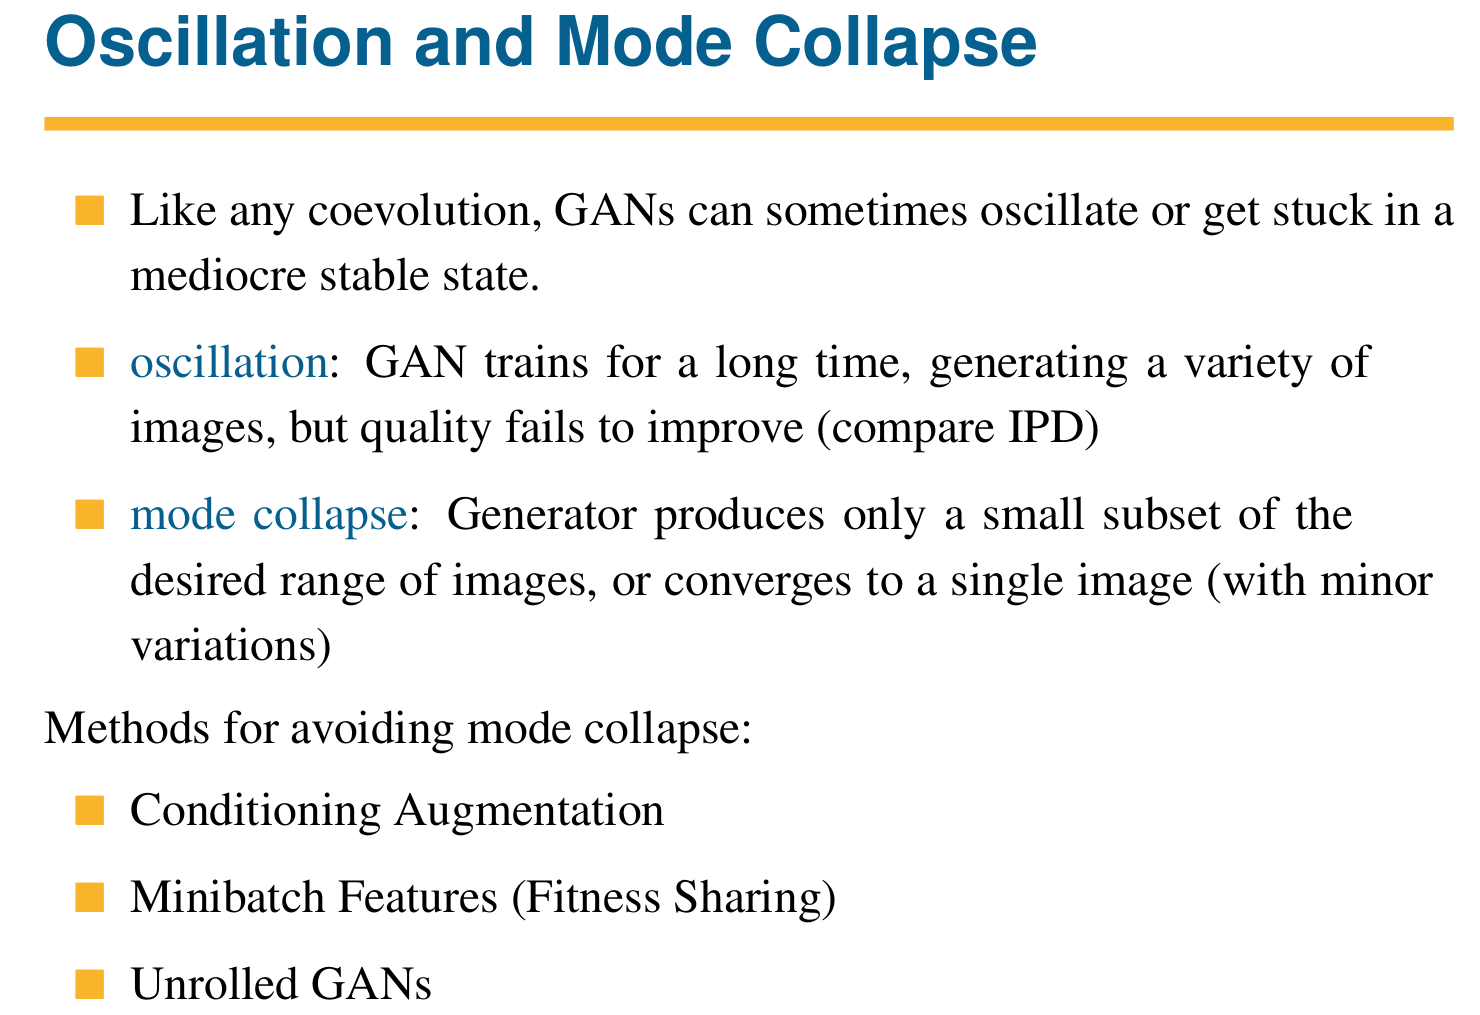